In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master'

In [3]:
ch2data = 'C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Chapter 2\\data'

In [4]:
gss_data = pd.read_stata(os.path.join(ch2data, 'GSS2012merged_R5.dta'), convert_categoricals = False)
#El argumento convert_categoricals = False instruye a pandas a no intentar convertir los datos de las columnas a categóricos.
#AKA factor data

In [5]:
gss_data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,1,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,3,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,4,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
gss_data.set_index('id', inplace = True) #columna id seleccionada como indice del dataframe.

In [7]:
"""gss_data.set_index('id')
gss_data.drop('id', 1, inplace = True)
#NO GOOD IN MY DATAFRAME. I JUST SET 'id' COLUMN AS INDEX COL FOR MY DATAFRAME AND IT WORKS FINE."""

"gss_data.set_index('id')\ngss_data.drop('id', 1, inplace = True)\n#NO GOOD IN MY DATAFRAME. I JUST SET 'id' COLUMN AS INDEX COL FOR MY DATAFRAME AND IT WORKS FINE."

In [8]:
gss_data.head()

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,marital,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
id,,,,,,,,,,,,,,,,,,,,,
1,2012,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#SAVE to CSV
gss_data.to_csv(os.path.join(ch2data, 'GSS2012idIndex.csv')) #Recordar este nombre

In [10]:
gss_data[['hrs1', 'grnsign']].describe(include='all')

,hrs1,grnsign
count,2854.000000,493.000000
mean,40.263840,1.764706
std,15.479284,0.424613
min,1.000000,1.000000
25%,35.000000,2.000000
50%,40.000000,2.000000
75%,50.000000,2.000000
max,89.000000,2.000000


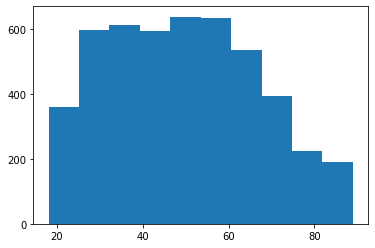

In [11]:
#Univariate data, Histograms
#Using 'age' column as example:
gss_data['age'].hist() #first line: column named age, applying hist() method
plt.grid() #second line: remove grid from plot (not needed) with plt.grid() function
plt.locator_params(nbins=5);#third line: define number of tick locators, 5 makes for 4 ticks

#Key feature of histogram is number of bins in which data is placed.

Text(0, 0.5, 'Respondents')

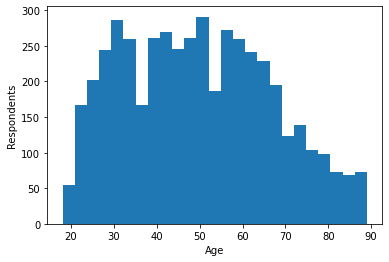

In [12]:
gss_data['age'].hist(bins=25) #increase bins to 25
plt.grid() #remove grid
plt.locator_params(nbins = 8) #playing with number of ticks for x-axis, 8 looks good
plt.xlabel('Age')
plt.ylabel('Respondents')

In [13]:
"""The distribution is approximately unimodal, that is, there is only one
significant hump. Notice that in making this assessment, we do not take into
account small gaps and peaks that are most likely due to sample randomness.

The distribution is asymmetrical, being somewhat skewed to the right, that is, it
has a longer tail extending toward the high values.

The distribution ranges, approximately, from 20 to 90 years, and is centered
somewhere near 50 years. It is not clear what is the mode, or highest point, of the
distribution.

There are no unusual features, such as outliers, gaps, or clusters.
"""

'The distribution is approximately unimodal, that is, there is only one\nsignificant hump. Notice that in making this assessment, we do not take into\naccount small gaps and peaks that are most likely due to sample randomness.\n\nThe distribution is asymmetrical, being somewhat skewed to the right, that is, it\nhas a longer tail extending toward the high values.\n\nThe distribution ranges, approximately, from 20 to 90 years, and is centered\nsomewhere near 50 years. It is not clear what is the mode, or highest point, of the\ndistribution.\n\nThere are no unusual features, such as outliers, gaps, or clusters.\n'

In [14]:
#Distribution of income of respondents, dataframe first, then plot:
inc_age = gss_data[['realrinc', 'age']]
inc_age.head(10)
#realrinc column has many missing values, as acknowledged in the textbook

,realrinc,age
id,,
1,NaN,22.0
2,NaN,21.0
3,58800.0,42.0
4,NaN,49.0
5,NaN,70.0
6,NaN,50.0
7,NaN,35.0
8,NaN,24.0
9,NaN,28.0


In [15]:
inc_age = gss_data[['realrinc','age']].dropna()
#dropping missing values and associated rows in 'age' column
inc_age.head(10)

,realrinc,age
id,,
3,58800.0,42.0
10,15925.0,28.0
12,3185.0,36.0
15,7962.5,52.0
16,26950.0,35.0
17,26950.0,36.0
18,22050.0,47.0
19,33075.0,55.0
23,33075.0,54.0


In [16]:
#inc_age.value_counts() #OUT: 1022 length

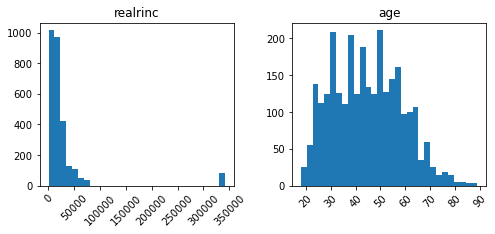

In [17]:
#We may now produce side-by-side histograms of the two variables, as shown:
ax_list = inc_age.hist(bins = 30, figsize = (8, 3), xrot = 45)
for ax in ax_list[0]:
    ax.grid() #removes grid from axes
    ax.locator_params(axis = 'x', nbins = 12)
    ax.locator_params(axis = 'y', nbins = 6)
#plt.grid()
#hist() method: bins(known), figsize 8 by 3 inches, xrot = rotation of x axis labels 45deg.
#the command returns a list of the axes objects of the figure:
#this is saved to the ax_list variable. Then iterate over this list to modify the plots drawn.

In [18]:
#Querying system for income counts above 300k
#(as there is a gap between 100k and 300k, ie few to no people earn more than 100k but less than 300k)
inc_age[inc_age['realrinc']>3.0E5].count()
#used Boolean operation

realrinc    80
age         80
dtype: int64

In [19]:
#80 people earn above 300k... looks unusual.
#having a closer look at the data, namely, seeing the actual incomes and ages

In [20]:
inc_age[inc_age['realrinc']>3.0E5].head(10) #All DATA VALUES ARE EQUAL! WTF?

,realrinc,age
id,,
43,341672.3793,51.0
44,341672.3793,57.0
45,341672.3793,44.0
48,341672.3793,68.0
55,341672.3793,46.0
127,341672.3793,53.0
242,341672.3793,61.0
262,341672.3793,55.0
264,341672.3793,43.0


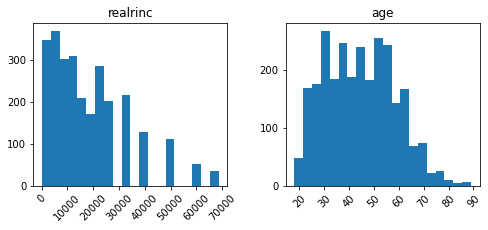

In [21]:
#income values above a certain value are lumped together, which explains the repeated value.
#The values above 300k may be legitimately excluded from the histograms:
lowinc_age = inc_age[inc_age['realrinc']<3.0E5] #Boolean selecting values below 300k, hence low income
ax_list2 = lowinc_age.hist(bins = 20, figsize = (8, 3), xrot = 45)
for ax in ax_list2[0]:
    ax.grid()
    ax.locator_params(axis = 'x', nbins = 8)
    ax.locator_params(axis = 'y', nbins = 4)

In [22]:
"""By looking at the output, we can see that the distributions are quite distinct. 
The income distribution is markedly skewed toward large values and appears to have 
several gaps. Note that the gaps may be due to the survey construction, especially 
with what concerns the way the real income is computed from the income ranges.
"""

'By looking at the output, we can see that the distributions are quite distinct. \nThe income distribution is markedly skewed toward large values and appears to have \nseveral gaps. Note that the gaps may be due to the survey construction, especially \nwith what concerns the way the real income is computed from the income ranges.\n'

In [23]:
#*TINKERING* What a figure's list of axes looks like:
#ax_list2
#OUT:array([[<AxesSubplot:title={'center':'realrinc'}>,
        #<AxesSubplot:title={'center':'age'}>]], dtype=object)
#for b, m in ax_list2:
#    print(b, m)
#OUT: AxesSubplot(0.125,0.125;0.336957x0.755) AxesSubplot(0.563043,0.125;0.336957x0.755) #*TINKERING*

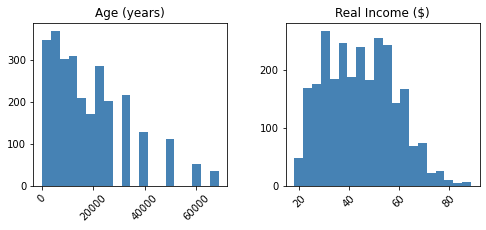

In [43]:
#Printing out pretty plots with matplotlib:
ax_list3 = lowinc_age.hist(bins = 20, figsize = (8, 3), xrot = 45, color = 'SteelBlue')
ax1, ax2 = ax_list3[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income ($)')
for ax in ax_list3[0]:
    ax.grid()
    ax.locator_params(axis = 'x', nbins = 6)
    ax.locator_params(axis = 'y', nbins = 4)

In [25]:
#When using matplotlib for plotting, there are several approaches to each command.
#Here, we show the object-oriented way, where ax1, ax2 = ax_list[0] fetches and
#stores the two axes. Then, we set the title and turn off the background grid of each axis
#using these objects.

Text(0.5, 0, 'Age (years)')

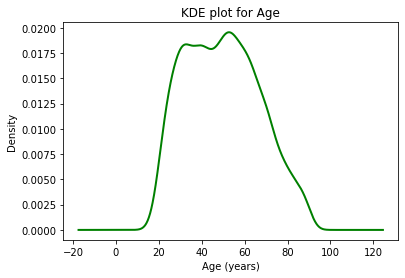

In [26]:
#CHARACTERIZATION
#Kernel Density Estimation (KDE), AKA "smoothed" histogram:
age = gss_data['age'].dropna()
age.plot(kind = 'kde', lw = 2, color = 'green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)')

Text(0.5, 0, 'Age (years)')

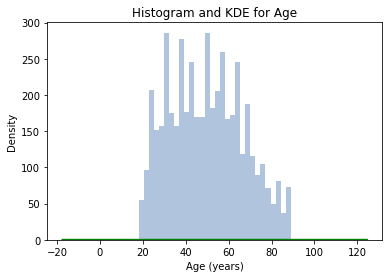

In [27]:
#Plotting the same KDE over the previous histogram for comparison:
ax = age.hist(bins = 30, color = 'LightSteelBlue')#, normed = True)
age.plot(kind = 'kde', lw = 2, color = 'Green', ax = ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)')
#NO GOOD

((array([-3.62347833, -3.38741543, -3.25727154, ...,  3.25727154,
          3.38741543,  3.62347833]),
  array([18., 18., 18., ..., 89., 89., 89.])),
 (16.99498585504628, 49.59467393583561, 0.9882188072238001))

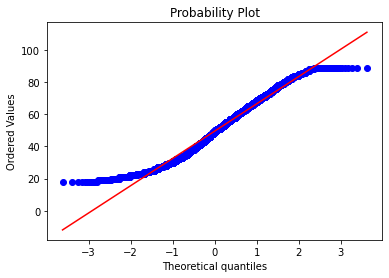

In [28]:
import scipy.stats as stats
stats.probplot(age, dist = 'norm', plot = plt)
#Normal distribution plot of age data: the data in blue does not correspond
#to a normal distribution therefore said plot would not be adequate for
#this data.

In [29]:
#Using statistical inference; 
#Range of data: smallest and largest values
#Measures of centrality: mean and the median (where is the center of the values?)
#Spread of data from its center: standard deviation and quartiles + percentiles
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc < 3.0E5]
lowinc.describe()

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
25%       6737.500000
50%      15925.000000
75%      26950.000000
max      68600.000000
Name: realrinc, dtype: float64

In [30]:
#If a more detailed view of the distribution is desired, a larger number
#of percentiles can be queried from the system:
lowinc.describe(percentiles = np.arange(0, 1.0, 0.1))

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
0%         245.000000
10%       2695.000000
20%       5512.500000
30%       9187.500000
40%      11637.500000
50%      15925.000000
60%      18375.000000
70%      22050.000000
80%      26950.000000
90%      40425.000000
max      68600.000000
Name: realrinc, dtype: float64

<AxesSubplot:>

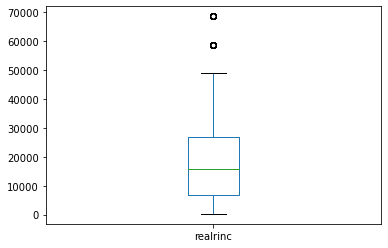

In [31]:
#Boxplot: useful to display center and spread of data:
lowinc.plot(kind = 'box')

<AxesSubplot:>

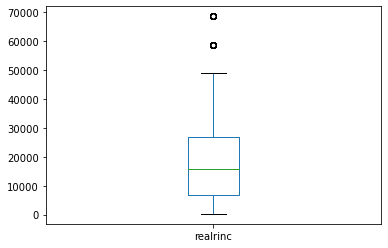

In [32]:
#other syntax:
lowinc.plot.box()

In [33]:
import seaborn as sns
#No seaborn installed yet...

<AxesSubplot:title={'center':'realrinc'}, xlabel='sex'>

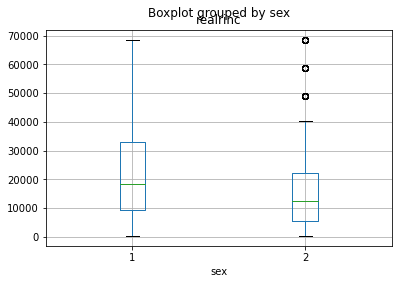

In [34]:
#Comparing data for different subpopulations - income male vs female:
inc_gen = gss_data[['realrinc', 'sex']]
inc_gen = inc_gen[inc_gen['realrinc']<3.0E5]
inc_gen.boxplot(column = 'realrinc', by = 'sex')

In [35]:
#Scatterplots to visualize relationships between variables:
#HUBBLE - relationship between distance and velocity of extragalactic nebulae
hubble_data = pd.read_csv(os.path.join(ch2data, 'hubble2.csv'))

<AxesSubplot:xlabel='r', ylabel='v'>

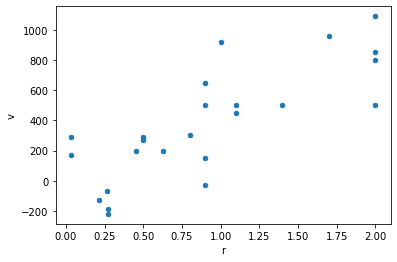

In [36]:
hubble_data.plot(kind = 'scatter', x = 'r', y = 'v')
#File required data cleanup. This is to be expected in many cases.

In [37]:
from scipy.stats import linregress

In [38]:
#rv = hubble_data.as_matrix(columns = ['r', 'v'])
#a, b, r, p, stderr = linregress(rv)
#print(a, b, r, p, stderr)

In [39]:
rv = np.array(hubble_data) #my workaround... maybe

In [40]:
#rv #Not needed...

<AxesSubplot:xlabel='r', ylabel='v'>

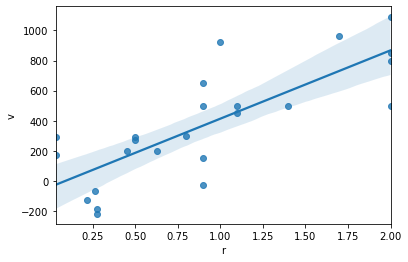

In [41]:
sns.regplot(x = 'r', y = 'v', data = hubble_data)
#It does appear to be consistent with the textbook's plot

In [42]:
#End of Chapter 2. On to notes#